# Programming for Astrophysics — Lecture notes
**Jarred Green**

**astrojarred@gmail.com**

## Contents:
  ### Lecture 1 — Setting up
    1. Markdown introduction
    2. Writing code in Jupyter
    3. Basic UNIX Commands
  ### Lecture 2 — Introduction to UNIX commands
    1. Pipes and chaining
    2. Wildcards
    3. Basic Scripting
    4. Arrays
    5. Grep
    6. Find
    7. Substitute Strings
  ### Lecture 3 — Introduction to Git
    1. Create repository on Github
    2. Github Version Control
    3. Git commands
  ### Lecture 4 — Introduction to Python!
    1. Clone Dario's Repository
    2. Command aliases
    3. Introduction to Python!
  ### Lecture 5 — Introduction to Python II + Plotting
    1. Tuples
    2. Dictionaries
    3. Control Flow
    4. Loops
    5. Functions
    6. Classes
    7. Modules
    8. Try and Accept
    9. Plotting
  ### Lecture 6 — GUI Programming and Widgets
    1. Install wxpython
    2. Our first application: "Hello, World"
    3. A simple text editor
    4. Status bars & Menu bars
    5. Event Handling
    6. Buttons
    
  ### Lecture 7 — More Widgets
    1. A multi-featured widget
    2. Notebook Demo
    3. Adding a grid
  ### Lecture 8 — Intro to astro py
    
    
    
--------

# Lecture 1 — Setting up
### January 9, 2017 (Morning)

### Before we start:
1. Install Anaconda v. 2.7
2. Create a git account
3. Understand how to run Jupyter Notebook

### Todo list—
1. Markdown introduction
2. Writing code in Jupyter
3. Basic UNIX Commands

## 1. Markdown introduction

- Use markdown when you just want something to appear as nice text.
- Great reference on github
  - https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

### Headers
#Main Header
##Sub-header
###Smaller Header
####Sub sub header
#####teehee

### Shortcuts

**Esc+M** --> Markdown

**Esc+Y** --> Code

**Shift+Return** --> Execute cell


### Formatting

**bold**

*italic*

***bold italic***

~~strikethrough~~

### Lists

- Item 1
- Item 2
- Item 3
  * item 3a
  * item 3b
  

### Mathematics
- put between dollar signs

$10^2$

$\log 12 * x$

$(a+b)/c$

$\frac{1}{2}$

### Block Quotes

> This is a block quote

### Tables

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3



| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

### Writing code

- python example

```python
import sys
```

- bash example

```bash
cd /Home/....
ls -l
```






## 2. Writing code in Jupyter

- You can write bash also in here using the prefix 
  - %%bash
- If you execute these it will print results!
- See e.g. below

In [4]:
%%bash
echo 'Hello World'

Hello World


In [3]:
! whoami

jarredgreen


## 3. Basic UNIX Commands

***Process code*** | ***Description*** | **Useful Arguements**
---|---|---
**ps -a** | shows all processes |
**ps -u jarredgreen** | shows processes of my user and process numbers |
**ps -u jarredgreen &#124; grep jup** | filters processes that contain "jup" and shows the process number |
**kill -9 %i** | kills process #i |
**bg** | runs a process in the background |
**fg %i** | brings a process back to the forground |
**whoami** | current user |
**pwd** | shows current directory |
**ls** | lists files in current directory | *-F* gives more details, *-a* shows hidden files too, *-t* orders by time, *-l* more info with privileges, \*.extension shows files with that extension, \* is a wildcard
**cd /filepath** | change directory to filepath |
**cd ..** | takes you to higher directory |
**man 'command'** | shows instructions for 'command' |
**mkdir 'folder name'** | creates a folder named 'folder name' |
**rmdir 'folder'** | will remove empty folder |
**mv** | moves a file or directory |
**rm** | deletes a file |
**history** | shows recent entries |
**cp** | copies files | *cp \*.txt directory* copies file to new name/place, *cp -r* copies recursively to another location
**vim** or **nano** | document editor |

___

# Lecture 2 — Introduction to UNIX commands
### January 9, 2017 (Afternoon)

- Continuing with bash / unix commands

### Todo list—
1. Pipes and chaining
2. Wildcards
3. Basic Scripting
4. Arrays
5. Grep
6. Find
7. Substitute Strings

### 1. Pipes and chaining

- **wc** shows charactercounts of files
- **wc -w** shows wordcounts
- **wc -l** shows line count

In [4]:
%%bash
wc *.ipynb

     276     714    5797 Lecture 1-Copy1.ipynb
     276     729    5885 Lecture 1.ipynb
      46      85     807 Lecture 2.ipynb
     598    1528   12489 total


In [5]:
%%bash
wc -w *.ipynb

     714 Lecture 1-Copy1.ipynb
     729 Lecture 1.ipynb
      85 Lecture 2.ipynb
    1528 total


- Let's write the line counts to a file called "lengths"

In [9]:
%%bash
wc -l *.ipynb > lengths

- Now let's add more information to the file using the double **>>**

In [10]:
%%bash
wc -w *.ipynb >> lengths

In [14]:
more lengths

**more** shows an overview of the file, **cat** prints all contents.

In [13]:
%%bash
cat lengths

     276 Lecture 1-Copy1.ipynb
     276 Lecture 1.ipynb
      46 Lecture 2.ipynb
     598 total
     714 Lecture 1-Copy1.ipynb
     729 Lecture 1.ipynb
      85 Lecture 2.ipynb
    1528 total


- Now let's try **sort**ing the file

In [16]:
%%bash
sort -n lengths > sorted-lengths.txt

In [17]:
%%bash
cat sorted-lengths.txt

      46 Lecture 2.ipynb
      85 Lecture 2.ipynb
     276 Lecture 1-Copy1.ipynb
     276 Lecture 1.ipynb
     598 total
     714 Lecture 1-Copy1.ipynb
     729 Lecture 1.ipynb
    1528 total


- **head -n 1** and **tail -n 1** will print the first or the last line of the file
  - -n means "numerically"

In [20]:
%%bash
tail -n 1 sorted-lengths.txt

    1528 total


In [21]:
%%bash
head -n 1 sorted-lengths.txt

      46 Lecture 2.ipynb


- **you can use pipes to chain commands**
- the following says
  - print line counts of files ending in .ipynb | then sort those entries numerically and > export to a text file

In [26]:
%%bash
wc -l *.ipynb | sort -n > newsort.txt

In [28]:
%%bash
cat newsort.txt

      46 Lecture 2.ipynb
     276 Lecture 1-Copy1.ipynb
     276 Lecture 1.ipynb
     598 total


- now let's just create some files for the sake of this example

In [34]:
%%bash
echo 'first line
second line
third line' > lines.ipynb

In [51]:
%%bash
echo 'lion
panther
person
tiger' > animals.txt

- can we find the second smallest file in length in one line of code?

In [55]:
%%bash
wc -l *.ipynb

       4 animals.ipynb


In [57]:
%%bash
wc -l *.ipynb | sort -n

       3 lines.ipynb
       4 animals.ipynb
      46 Lecture 2.ipynb
     276 Lecture 1-Copy1.ipynb
     551 Lecture 1.ipynb
     880 total


In [58]:
%%bash
wc -l *.ipynb | sort -n | head -2

       3 lines.ipynb
       4 animals.ipynb


In [59]:
%%bash
wc -l *.ipynb | sort -n | head -2 | tail -1

       4 animals.ipynb


- **we did it!**

### 2. Wildcards

**command** | **meaning**
--- | ---
\* | any string of any length
? | any single character
[a-r] | everything from a-r
\*[1-9]\* | everthing with a number from 1-9 in the middle (FROM)
[!a] | everyhing excluding "a" (NOT)
{\*doc, \*pdf} | lets you pick multiple things (OR)
[^a] | beginning of line
[\$a] | a at end of line

- **tr**, **cut**, **uniq** commands

**command** | **meaning** | **extensions**
--- | --- | ---
**tr** | translates characters | **-s** squeezes characters together, 
**cut** | divide a file into separate parts | **cut -c x-y** selects charaters in position x-y
**uniq** | show only unique values |

**uniq**
- See example below for uniq

In [62]:
%%bash
#make a file with numbers:
echo '1
1
2
3
5
8
13' > numbers.txt

In [63]:
%%bash
cat numbers.txt

1
1
2
3
5
8
13


In [64]:
%%bash
cat numbers.txt | sort -n | uniq

1
2
3
5
8
13


**cut:**

In [1]:
%%bash
wc -l *.ipynb | cut -c 8-25

6 Lecture 1-Copy1.
7 Lecture 1.ipynb
6 Lecture 2.ipynb
4 animals.ipynb
3 lines.ipynb
6 total


**tr:**

-squeeze:

In [2]:
%%bash
echo 'A beautiful     morning in Innsbruck' | tr -s " "

A beautiful morning in Innsbruck


In [5]:
%%bash
echo 'A beautifulllll morning in Innsbruck' | tr -s "l"

A beautiful morning in Innsbruck


**tr "x" "y"** replaces x with y

- in this example "/n" means a "line break"
- so, replace line break with spaces:

In [7]:
%%bash
echo 'A
beautiful
morning
in
Innsbruck' | tr "\n" " "

A beautiful morning in Innsbruck 

### 3. Basic Scripting

- Let's write a simple script (using a loop) to replicate the **ls** function

In [15]:
%%bash
#this code replicates the basic ls function on unix, listing files in the directory
for filename in *.ipynb
    do
        echo 'This file is: '$filename
    done

This file is: Lecture 1-Copy1.ipynb
This file is: Lecture 1.ipynb
This file is: Lecture 2.ipynb
This file is: animals.ipynb
This file is: lines.ipynb


- Can we do the same thing, saving it to a file?

In [64]:
%%bash
#what does the line belwo do? Shibang line
echo '#/usr/bin/env bash
echo 'This takes all .txt files, prints the filename, and prints the last five lines!'
for filename in *.txt
do
    echo "This file is: "$filename
    tail -5 $filename
done' > script.sh
#save file to a script
chmod +x script.sh
# makes the file executable

In [65]:
%%bash
ls -F script.sh

script.sh*


In [66]:
%%bash
./script.sh

This takes all .txt files, prints the filename, and prints the last five lines!
This file is: newsort.txt
      46 Lecture 2.ipynb
     276 Lecture 1-Copy1.ipynb
     276 Lecture 1.ipynb
     598 total
This file is: numbers.txt
2
3
5
8
13
This file is: sorted-lengths.txt
     276 Lecture 1.ipynb
     598 total
     714 Lecture 1-Copy1.ipynb
     729 Lecture 1.ipynb
    1528 total


**- Or you can do it all in one line:**

In [72]:
# I missed this code, but he somehow used semi-colons to separate the lines

### 4. Arrays

- The following is how you should format arrays in bash

In [2]:
ARRAY=("val1""val2""val3")

#or...
ARRAY=(
"val1"
"val2"
"val3"
)

- Ok not really sure what the next one is doing, and it's hard to make comments in there

In [3]:
%%bash
echo '#/usr/bin/env bash' > script3.sh
echo '
dir0="/dir/"
ARRAY=(
"val1"
"val2"
"val3"
)
echo "2nd value is "${ARRAY[1]}
for name in "${ARRAY[@]}"
do
    echo $dir0$name
done
' >> script3.sh

chmod +x script3.sh

In [4]:
%%bash
./script3.sh

2nd value is val2
/dir/val1
/dir/val2
/dir/val3


### 5. Grep

**grep** is great at searching through documents for you
Below we created a document with a few words:

**Arguments** | **function**
--- | ---
-n | gives line number
-i | ignore case
-w | the expression is searched for as a word
-v | gives inverse
-e | specify a pattern used during search

In [73]:
%%bash
echo 'mars
earth
jupiter
saturn
venus' > planets_list.txt

- see the below examples

In [75]:
%%bash
grep u planets_list.txt

jupiter
saturn
venus


In [77]:
%%bash
grep ur planets_list.txt

saturn


In [78]:
%%bash
grep "t.r" planets_list.txt

jupiter
saturn


In [81]:
%%bash
grep "u[rs]" planets_list.txt

saturn
venus


- these things like "t.r" are called "regular expressions" and have many rules and can be quite complex.
- see the wikipedia page for all different (crazy) rules
  - https://en.wikipedia.org/wiki/Regular_expression

### Examples
- from wikipedia

**Regular Expressions**


**Example** | **Function**
--- | ---
.at | matches any three-character string ending with "at", including "hat", "cat", and "bat"
[hc]at | matches "hat" and "cat".
[^b]at | matches all strings matched by .at except "bat".
[^hc]at | matches all strings matched by .at other than "hat" and "cat".
^[hc]at | matches "hat" and "cat", but only at the beginning of the string or line.
[hc]at$ | matches "hat" and "cat", but only at the end of the string or line.
\[.\] | matches any single character surrounded by "[" and "]" since the brackets are escaped, for example: "[a]" and "[b]".
s.* | matches s followed by zero or more characters, for example: "s" and "saw" and "seed".

### 6. Find

**find** will walk through a directory in all sub-folders and find files

**Arguments** | **function**
--- | ---
-type d | looks for directories

In [91]:
%%bash
find .

.
./.DS_Store
./.ipynb_checkpoints
./.ipynb_checkpoints/Lecture 1-checkpoint.ipynb
./.ipynb_checkpoints/Lecture 1-Copy1-checkpoint.ipynb
./.ipynb_checkpoints/Lecture 2-checkpoint.ipynb
./animals.ipynb
./Lecture 1-Copy1.ipynb
./Lecture 1.ipynb
./Lecture 2.ipynb
./lines.ipynb
./newsort.txt
./numbers.txt
./planets_list.txt
./script.sh
./script3.sh
./sorted-lengths.txt


In [96]:
%%bash
#list all directories starting from the one above
find .. -type d

..
../Advanced Mathematics
../Advanced Mathematics/Lecture
../Advanced Mathematics/Lecture/Lecture Notes
../Advanced Mathematics/Lecture/Study Guides
../Advanced Mathematics/Proseminar
../Advanced Mathematics/Proseminar/Exams
../Advanced Mathematics/Proseminar/PS Exercise Sheets
../Advanced Mathematics/Proseminar/PS Homework
../Advanced Mathematics/Proseminar/PS Homework/Solutions
../Advanced Mathematics/Proseminar/PS Homework/Solutions/From Professors
../Advanced Mathematics/Proseminar/PS Homework/Solutions/Javier Solutions
../Baysean
../Concepts of Physics
../Concepts of Physics/Lectures
../Concepts of Physics/Lectures/Lecture Homework
../Concepts of Physics/Lectures/Lecture Homework/HW1 Resources
../Concepts of Physics/Lectures/Lecture Homework/Javier Solutions
../Concepts of Physics/Lectures/Lecture Notes
../Concepts of Physics/Lectures/Resources
../Concepts of Physics/Lectures/Resources/Adrian's Notes
../Concepts of Physics/Lectures/Resources/Agata's Quantum Notes
../Concepts of P

In [99]:
%%bash
# you can also use find as an argument for another command
wc -l $(find .. -name '*.txt')

       4 ../Programming/newsort.txt
       7 ../Programming/numbers.txt
       5 ../Programming/planets_list.txt
       8 ../Programming/sorted-lengths.txt
      24 total


- Finally, we can see how to pass arguments to find

In [100]:
%%bash
#not sure what this one is doing, look further into it
find .. -name '*.txt' -exec dirname {} \; | uniq

../Programming


### 7. Substitute Strings

ways to do this include **sed**, **awk**, and **perl**

**sed** usually does this trick

-in the following case it's kind of like find and replace

In [101]:
%%bash
echo 'The cat runs on the roof' | sed 's/run/walk/'

The cat walks on the roof


- In this eample we will use perl to do this

In [108]:
%%bash
echo 'This file is rotten' > rotten.txt
cat rotten.txt
perl -pi -e 's/rotten/fresh/' rotten.txt
# -e implies that this is a regular expression
cat rotten.txt

This file is rotten
This file is fresh


-------

# Lecture 3 — Introduction to Git
### January 10, 2017 (Morning)

### Todo list—
1. Create repository on Github
2. Github Version Control
3. Git commands

## 1. Github Repository
- just go to the website and make a new repository 

## 2. Github Version Control
- keeps track of every change in your code
- backs up remotely
- allows for remote collaboration
- shows who has made each edit

#### Terminology

**Word** | **Definition**
--- | ---
Repository | where source code is stored
Checkout | download a local copy of the files
Commit | saving modification
Master | the current release version of the file
Branch | a working copy of the master that you can edit
Merge | merging the current branch with the current master
Conflict | when you must pick between code from the master or the branch
Forking | creating a new branch
Clone | making a copy of the repository (and history) on the local machine
Pull | grab code from cloud
Push | upload local code to the repository

#### Git Configuration on the local machine

```bash
git config --global user.name "your name"
git config --global user.email "your email"
git config --global color.ui "auto"
git config --global core.editor "vim"
```

In [1]:
%%bash
git config --list

credential.helper=osxkeychain
user.name=astrojarred
user.email=astrojarred@gmail.com
core.editor=vim
color.ui=auto


## 3. Git Commands

**Make a Repository**

```bash
mkdir Repos
cd Repos
git init Repos
```


**Clone a repository**

```bash
git clone https://github.com/User/Your_Repository
```

**Check the status of the repository**

```bash
git status
```

**Adding a file**
```bash
git add filename
git status
```

-add all files
```bash
git add .
```

**Committing a change**
```bash
git commit -m "your comments" filename
```

**Uploading changes to github**
```bash
git push
```

**Seeing log of changes**
```bash
git log
```

----

#### Let's add and remove a temporary file as a test:

- Create a file and commit

```bash
echo '' > tmpfile
```

```bash
git add tempfile
git commit -m "Created a tmpfile" tmpfile
```

- Delete the file and commit

```bash
rm tmpfile
```

```bash
git commit -m "Deleted the tmpfile" tmpfile
```

- Check the log

```bash
git log
```

- Checks just the most recent log item

```bash
git log -1
```

# Lecture 4  — Introduction to Python
### January 11, 2017 (Morning)

### Todo list—
1. Clone Dario's Repository
2. Command aliases
3. Introduction to Python!

## 1. Cloning Repositories

```bash
git clone http://www.github.com/darioflute/CS4A.git
```

- now cd into the folder
```bash
cd CS4A
```

- now try to update the repository
- it should say "up to date"
```bash
git pull origin master
```

## 2. Command aliases

```bash
cd ~
vim bash.rc
```

- add the line

```bash
alias jn = "jupyter notebook"
```

## 3. Introduction to Python

- This will create a basic python script:

In [4]:
%%writefile hello-world.py
#!/usr/bin/env python
print ("Hello world!")

Overwriting hello-world.py


- now let's make it executable
```bash
!chmod +x hello-world.py
```

- Writing using other character sets

```python
writefile hello-world-in-german.py
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

print(" Meine Völker !")
```

### Importing Packages

- Allows you to import other commands
- The math package has mathematical functions for example

```python
import math
x = math.cos( 2 * math.pi )
```

**OR** for easier reading

```python
from math import cos,pi
x = cos( 2 * pi )
print(x)
```

### Examening Packages

```python
import math
print(dir(math))
```

In [7]:
import math
print(dir(math))

['__doc__', '__file__', '__name__', '__package__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'hypot', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'modf', 'pi', 'pow', 'radians', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'trunc']


In [8]:
import math
help(math.log)

Help on built-in function log in module math:

log(...)
    log(x[, base])
    
    Return the logarithm of x to the given base.
    If the base not specified, returns the natural logarithm (base e) of x.



- Some useful pagkages include os, sys, math, and more

### Variables

```python
x = 10.
print (x)
print ( type(x) )
```

- adding a '.' at the end defines it as a float:

In [10]:
x = 10.
print (x)
print ( type(x) )

10.0
<type 'float'>


#### Variable types

example | type
--- | ---
10. | float
True | bool
10 - 10j | complex


In [11]:
# let's check if a type is what we want
x = 1.0
type(x) is float

True

In [12]:
# we can even save the type as a bool
x = 1.0
typex = type(x) is float
print typex

True


In [13]:
# there is also a function for this
isinstance(x, float)

True

### Type Casting

In [40]:
x = 10.
print (x)
x = int(x)
print (x)
print( list(s))

10.0
10
['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd']


### Basic Operations

- to the power  \*\*
- division /
- integer division //
- or, and, not, >, <, >=, <=, ==

In [18]:
print (True or False)
print (True and False)
print (not True)

True
False
False


- arrays

```python
list1 = [1,2,3,4]
```


### Strings

- just text

In [29]:
s = "Hello World"
print(s)
print( type(s) )
len(s)                                     #length
s2 = s.replace("World" , "Friends")        #replaces strings
print(s2)
print(len(s2))
print(s2[4])                               # counting starts at 0
print(s[0:5])                              # print characters 0-4
print(s[:5])                               # same as above
print(s[5:])                               # 5th till the end
#print(s(5:-1))                             # 5th to second to last
print(s[:])                                # : is all chars
print(s[::2])                              # prints in steps of 2

Hello World
<type 'str'>
Hello Friends
13
o
Hello
Hello
 World
Hello World
HloWrd


- **string formatting**

### Lists

In [30]:
# Create a list
l = [1,2,3,4]
type(l)

list

In [32]:
# print certain elements
print (l[2])
print (l[-1])

3
4


**note: a list is not an array**
- you can put different types of things in there
- you can also nest lists

In [34]:
# look at all the different types inside!
l2 = [1, 2j, "Hello", True]

**Range**

In [39]:
print( range(5) )
print( range(4,7) )
print( range(0,20, 4))


[0, 1, 2, 3, 4]
[4, 5, 6]
[0, 4, 8, 12, 16]


### More list operations

- Check out this example from https://learnpythonthehardway.org/book/ex38.html


In [14]:
ten_things = "Apples Oranges Crows Telephone Light Sugar"

print "Wait there are not 10 things in that list. Let's fix that."

stuff = ten_things.split(' ')
more_stuff = ["Day", "Night", "Song", "Frisbee", "Corn", "Banana", "Girl", "Boy"]

while len(stuff) != 10:
    next_one = more_stuff.pop()
    print "Adding: ", next_one
    stuff.append(next_one)
    print "There are %d items now." % len(stuff)

print "There we go: ", stuff

print "Let's do some things with stuff."

print stuff[1]
print stuff[-1] # whoa! fancy
print stuff.pop()
print ' '.join(stuff) # what? cool!
print '#'.join(stuff[3:5]) # super stellar!


Wait there are not 10 things in that list. Let's fix that.
Adding:  Boy
There are 7 items now.
Adding:  Girl
There are 8 items now.
Adding:  Banana
There are 9 items now.
Adding:  Corn
There are 10 items now.
There we go:  ['Apples', 'Oranges', 'Crows', 'Telephone', 'Light', 'Sugar', 'Boy', 'Girl', 'Banana', 'Corn']
Let's do some things with stuff.
Oranges
Corn
Corn
Apples Oranges Crows Telephone Light Sugar Boy Girl Banana
Telephone#Light


------

# Lecture 5  — Introduction to Python, pt. 2
### January 11, 2017 (Afternoon)

### Todo list—
1. Tuples
2. Dictionaries
3. Control Flow
4. Loops
5. Functions
6. Classes
7. Modules
8. Try and Accept

## 1. Tuples

- a tuple is a sequence of immutable Python objects. Tuples are sequences, just like lists.
- the differences between tuples and lists are, the tuples cannot be changed unlike lists and tuples use parentheses, whereas lists use square brackets.
- they are like lists, but you can not editable
- use parenthesis

```python
point = (10,20)
```

In [2]:
point = (10,20)
print(point)

(10, 20)


In [4]:
x, y = point
print(x)
print(y)

10
20


## 2. Dictionaries

- Like lists, but each element is a pair

```python
stuff = {'name': 'Zed', 'age': 39, 'height': 6 * 12 + 2}
```

- see the below example for uses of dictionaries from https://learnpythonthehardway.org/book/ex39.html

In [13]:
states = {
    'Oregon': 'OR',
    'Florida': 'FL',
    'California': 'CA',
    'New York': 'NY',
    'Michigan': 'MI'
}

print(states)

#make a second dictionary

cities = {
    'CA': 'San Francisco',
    'MI': 'Detroit',
    'FL': 'Jacksonville'
}

# add some more cities
cities['NY'] = 'New York'
cities['OR'] = 'Portland'

# print out some cities
print '-' * 10
print "NY State has: ", cities['NY']
print "OR State has: ", cities['OR']

# print some states
print '-' * 10
print "Michigan's abbreviation is: ", states['Michigan']
print "Florida's abbreviation is: ", states['Florida']

# do it by using the state then cities dict
print '-' * 10
print "Michigan has: ", cities[states['Michigan']]
print "Florida has: ", cities[states['Florida']]

# print every state abbreviation
print '-' * 10
for state, abbrev in states.items():
    print "%s is abbreviated %s" % (state, abbrev)

# print every city in state
print '-' * 10
for abbrev, city in cities.items():
    print "%s has the city %s" % (abbrev, city)

# now do both at the same time
print '-' * 10
for state, abbrev in states.items():
    print "%s state is abbreviated %s and has city %s" % (
        state, abbrev, cities[abbrev])

print '-' * 10
# safely get a abbreviation by state that might not be there
state = states.get('Texas')

if not state:
    print "Sorry, no Texas."

# get a city with a default value
city = cities.get('TX', 'Does Not Exist')
print "The city for the state 'TX' is: %s" % city


{'California': 'CA', 'Michigan': 'MI', 'New York': 'NY', 'Florida': 'FL', 'Oregon': 'OR'}
----------
NY State has:  New York
OR State has:  Portland
----------
Michigan's abbreviation is:  MI
Florida's abbreviation is:  FL
----------
Michigan has:  Detroit
Florida has:  Jacksonville
----------
California is abbreviated CA
Michigan is abbreviated MI
New York is abbreviated NY
Florida is abbreviated FL
Oregon is abbreviated OR
----------
FL has the city Jacksonville
CA has the city San Francisco
MI has the city Detroit
OR has the city Portland
NY has the city New York
----------
California state is abbreviated CA and has city San Francisco
Michigan state is abbreviated MI and has city Detroit
New York state is abbreviated NY and has city New York
Florida state is abbreviated FL and has city Jacksonville
Oregon state is abbreviated OR and has city Portland
----------
Sorry, no Texas.
The city for the state 'TX' is: Does Not Exist


## 3. Control Flow

- **if, elif, else**: the three main conditional words
  - **if** — put first- if x is true, do the following
  - **elif** — if the last thing wasn't true, do this, you can put as many as these as you want
  - **else** — if none of the above stuff was true, do this.  (It's kind of like the last resort.)
- Check out Dario's example below:

In [17]:
#change around statements 1 and 2 from True to False, and see what results you get!

statement1 = True
statement2 = False
if statement1:                     # This is equilvalent to saying "If statement1 is True, do the following"
    print ('Statement 1 is true')
    print ('I am very sorry')
elif statement2 == False:          # This is like saying "if the last thing wasn't true try this instead"
    print ("Nothing")
else:                              # This is like saying "because none of the previous stuff was true, just do this"
    print ("Statement 1 is false")

Statement 1 is true
I am very sorry


- Check out this fun example from https://learnpythonthehardway.org/book/ex31.html
  - I've added some notes to here

In [18]:
print "You enter a dark room with two doors.  Do you go through door #1 or door #2?"

door = raw_input("> ") #this lets you enter your own text

if door == "1":
    print "There's a giant bear here eating a cheese cake.  What do you do?"
    print "1. Take the cake."
    print "2. Scream at the bear."

    bear = raw_input("> ")

    if bear == "1":
        print "The bear eats your face off.  Good job!"
    elif bear == "2":
        print "The bear eats your legs off.  Good job!"
    else:
        print "Well, doing %s is probably better.  Bear runs away." % bear

elif door == "2":
    print "You stare into the endless abyss at Cthulhu's retina."
    print "1. Blueberries."
    print "2. Yellow jacket clothespins."
    print "3. Understanding revolvers yelling melodies."

    insanity = raw_input("> ")

    if insanity == "1" or insanity == "2":
        print "Your body survives powered by a mind of jello.  Good job!"
    else:
        print "The insanity rots your eyes into a pool of muck.  Good job!"

else:
    print "You stumble around and fall on a knife and die.  Good job!"


You enter a dark room with two doors.  Do you go through door #1 or door #2?
> 1
There's a giant bear here eating a cheese cake.  What do you do?
1. Take the cake.
2. Scream at the bear.
> 1
The bear eats your face off.  Good job!


## 4. Loops

### for loops

- will repeat the same action over and over

```python
for x in [1,2,3]:
    print[x]
    
    1
    2
    3
```

In [21]:
# Here's another example:

for x in range(-3,3):
    print(x)

-3
-2
-1
0
1
2


In [22]:
# Here's a simple example from https://learnpythonthehardway.org/book/ex32.html

the_count = [1, 2, 3, 4, 5]
fruits = ['apples', 'oranges', 'pears', 'apricots']
change = [1, 'pennies', 2, 'dimes', 3, 'quarters']

# this first kind of for-loop goes through a list
for number in the_count:
    print "This is count %d" % number

# same as above
for fruit in fruits:
    print "A fruit of type: %s" % fruit

# also we can go through mixed lists too
# notice we have to use %r since we don't know what's in it
for i in change:
    print "I got %r" % i

# we can also build lists, first start with an empty one
elements = []

# then use the range function to do 0 to 5 counts
for i in range(0, 6):
    print "Adding %d to the list." % i
    # append is a function that lists understand
    elements.append(i)

# now we can print them out too
for i in elements:
    print "Element was: %d" % i

This is count 1
This is count 2
This is count 3
This is count 4
This is count 5
A fruit of type: apples
A fruit of type: oranges
A fruit of type: pears
A fruit of type: apricots
I got 1
I got 'pennies'
I got 2
I got 'dimes'
I got 3
I got 'quarters'
Adding 0 to the list.
Adding 1 to the list.
Adding 2 to the list.
Adding 3 to the list.
Adding 4 to the list.
Adding 5 to the list.
Element was: 0
Element was: 1
Element was: 2
Element was: 3
Element was: 4
Element was: 5


In [23]:
# let's make a list of perfect squares
# this is cool because we're doing it all in one line
squares = [x**2 for x in range(0,8)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49]


### while loops

- loops something until a condition is satisfied

In [24]:
i = 0

while i < 5:  # as long as i is less than 5, do this thing over and over
    print(i)
    i +=1     # set i to what it was before, but add one

0
1
2
3
4


## 5. Functions

**Functions do three things:**

- They name pieces of code the way variables name strings and numbers.
- They take arguments the way your scripts take argv.
- Using 1 and 2 they let you make your own "mini-scripts" or "tiny commands."

You can create a function by using the word def in Python. I'm going to have you make four different functions that work like your scripts, and I'll then show you how each one is related.

The simple one below just prints the word "test"

In [26]:
def func0():
    print("test")
    
func0()

test


In [32]:
def func1(s):
    '''this is our second test function
    s is the thing that will print'''
    print ("You wrote "+s)
    
func1("aaa")

help(func1)

You wrote aaa
Help on function func1 in module __main__:

func1(s)
    this is our second test function
    s is the thing that will print



In [33]:
def square(x):
    """Return the square of x"""
    return x ** 2

# we set a to equal our function 
a = square(4)
print(a)

16


In [38]:
def powers(x):
    """Return the first three powers of x"""
    return x ** 2., x ** 3., x ** 4.

# we set a to equal our function 
print(powers(3))

# the following saves the three results from the above function as three separate variables, named p2, p3, and p4
# so now we can use them separately
p2,p3,p4 = powers(3.)
print(p2,p3,p4)
print(p2 + p3 + p4)

(9.0, 27.0, 81.0)
(9.0, 27.0, 81.0)
117.0


In [46]:
def myfunc(x, p=2, debug=False):
    if debug:
        print ("I am in debug mode")
        return x ** p
    else:
        print (x ** p)
    
print( myfunc(2,p=2,debug=True))

I am in debug mode
4


### Lambda functions

- The only advantage of this is the fact that you can use it on one line
- It's used a lot mainy because it's very compact

In [47]:
fl = lambda x: x**2
print (fl(2))

4


## 6. Classes

- Python is called an "object-oriented programming language."
- This means there is a construct in Python called a class that lets you structure your software in a particular way.  - Using classes, you can add consistency to your programs so that they can be used in a cleaner way.
  - At least that's the theory...
  - (https://learnpythonthehardway.org/book/ex40.html)
  
A class has variables, but also some fuctions that act on those variables.  All at the same time.

See Dario's example below:

In [52]:
class Point:
    '''
    Simple class for representing a point in a Cartesian plane
    '''
    def __init__(self, x, y):
        '''
        Create a new point at x, y
        '''
        self.x = x
        self.y = y
    def translate(self, dx, dy):
        '''
        translates a point by dx and 
        '''
        self.x += dx
        self.y += dy
    def __str__(self):
        return("Point at [%f, %f]" % (self.x, self.y))
        

In [70]:
pt = Point(0,0)
print(pt)

pt.translate(1,-1)
print(pt)

Point at [0.000000, 0.000000]
Point at [1.000000, -1.000000]


## 7. Modules

- Modules are like dictionaries
- You know how a dictionary is created and used and that it is a way to map one thing to another. That means if you have a dictionary with a key "apple" and you want to get it then you do this:

```python
mystuff = {'apple': "I AM APPLES!"}
print mystuff['apple']
```

Keep this idea of "get X from Y" in your head, and now think about modules. You've made a few so far, and you should know they are:

1. A Python file with some functions or variables in it ..
2. You import that file.
3. And you can access the functions or variables in that module with the . (dot) operator.

In [74]:
# this goes in mystuff.py
def apple():
    print "I AM APPLES!"

# this is just a variable
tangerine = "Living reflection of a dream"

## 8. Try and Except

In Python errors are managed with a special language construct called "Exceptions". When errors occur exceptions can be raised, which interrupts the normal program flow and fallback to somewhere else in the code where the closest try-except statement is defined.
To generate an exception we can use the raise statement, which takes an argument that must be an instance of the class BaseException or a class derived from it. 

In [1]:
"""test = "Nuclear test"

try:
    print('test')
    # generates an error: the variable test is not defined
    #etc
    
    """

SyntaxError: invalid syntax (<ipython-input-1-d31d321c142f>, line 8)

Ok to be honest I have no idea what the above is... oh well

## 9. Plotting

**See this guide for Dario's full tutorial on plotting with mathplotlib:            
https://github.com/darioflute/CS4A/blob/master/Lecture-plotting.ipynb**

- type the following line at the beginning
- this is so that plots will show up inside Jupyter, I don't think you need it in your code

```python
%matplotlib inline
```

### Basic Plotting

- when Dario adds his notes for plotting I will paste it here
- the following command will import the module and name it plt

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
# numerical python = numpy
import numpy as np

/Users/jarredgreen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


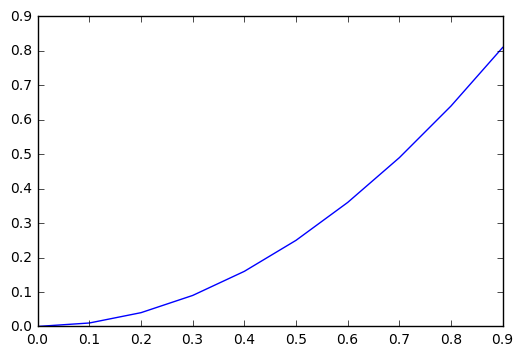

In [20]:
x = np.arange(0,1,0.1)
y = x**2
plt.plot(x,y)

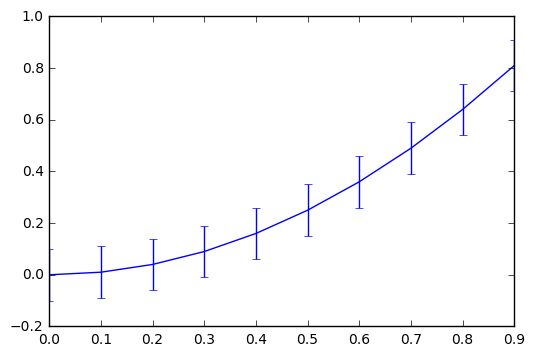

In [23]:
#error bars example
yerr = np.ones(x.size)*0.1 #ones creates an array of 1's
plt.errorbar(x,y,yerr=yerr)
plt.show()

### See this link for more documentation
- intro http://matplotlib.org/users/pyplot_tutorial.html
- full beginners guide http://matplotlib.org/users/beginner.html
- all documentations for matplotlib http://matplotlib.org/contents.html

In [25]:
#3D plotting documents
from mpl_toolkits.mplot3d.axes3d import Axes3D

-------

# Lecture 6 — GUI Programming and Widgets
### January 12, 2017 (Morning)

Todo
1. Install wxpython
2. Our first application: "Hello, World"
3. A simple text editor
4. Status bars & Menu bars
5. Event Handling
6. Buttons


wxpython is basically just a python package that lets you make little windows and applications.
there are many other packages that do the same thing
Check them all out here! https://wiki.python.org/moin/GuiProgramming

## 1. Install wxpython

**This is quite confusing, and if you are curious to read more about this wxpython widget package check out the official documentation at https://wiki.wxpython.org/Getting%20Started**

- To make a graphical interface to use a code in an interactive way we need a library of widgets, called wxpython.  We will explore the usage of this library mainly with examples.  But to start we have to install it with conda.

- run the following command:

```bash
conda install wxpython
```

## 2. Our first application

A traditional "Hello, World" application

In [17]:
%%writefile framecode.py
#!/usr/bin/env pythonw                            #!/usr/bin/env python on linux
import wx

app = wx.App(False)                               #create a new app, don't redirect stdout/stderr to
frame = wx.Frame(None, wx.ID_ANY, "Hello World")  # A frame is the top-level
frame.Show(True)                                  #Show the frame
app.MainLoop()

Overwriting framecode.py


In [19]:
!pythonw framecode.py                             #!python framecode.py on linux

## 3. wx.TextCtrl widget  — A simple text editor

This little app will let you type some text into a box.  Cool!!

In [ ]:
%%writefile editor.py
#!/usr/bin/env pythonw
import wx
class MyFrame(wx.Frame):
        """We simply derive a new class of frame"""
        def __init__(self, parent, title):
            wx.Frame.__init__(self, parent, title=title, size=(200,100))
            self.control = wx.TextCtrl(self, style=wx.TE_MULTILINE)
            self.Show(True)
            
app = wx.App(False)
frame = MyFrame(None, 'Small editor')
app.MainLoop()

In [ ]:
!pythonw editor.py

## 4. Status bars & Menu bars

In [21]:
%%writefile MainWindow.py
#!/usr/bin/env pythonw
import wx
class MyFrame(wx.Frame):
        """We simply derive a new class of frame"""
        def __init__(self, parent, title):
            wx.Frame.__init__(self, parent, title=title, size=(200,100))
            self.control = wx.TextCtrl(self, style=wx.TE_MULTILINE)
            self.CreateStatusBar() #A statusbar at the bottom of the window
            
            # setting up the menu.
            filemenu= wx.Menu()
            
            # wx.ID_ABOUT and wx.ID_EXIT are standard IDs provided by wxWidgets
            filemenu.Append(wx.ID_ABOUT, "&About"," Information about this program")
            filemenu.AppendSeparator()
            filemenu.Append(wx.ID_EDIT, "&Exit"," Terminate the program")
            
            # Creating the menubar
            menuBar = wx.MenuBar()
            menuBar.Append(filemenu, "&File") # adding the "filename" to the...
            self.SetMenuBar(menuBar) # Adding the MenuBar for the Frame content
            self.Show(True)
            
app = wx.App(False)
frame = MyFrame(None, 'Sample editor')
app.MainLoop()

Overwriting MainWindow.py


In [22]:
!pythonw MainWindow.py

## 5. Event Handling

- Reacting to evens in wxPython is called event handling.
- And event is when "something happens in your application
  - eg button click, text input, mouse movement, etc)
  - Much of GUI programming consists of responding to events
  
Cope same code as  

In [38]:
%%writefile MenuActions.py
#!/usr/bin/env pythonw
import wx
class MyFrame(wx.Frame):
        """We simply derive a new class of frame"""
        def __init__(self, parent, title):
            wx.Frame.__init__(self, parent, title=title, size=(200,100))
            self.control = wx.TextCtrl(self, style=wx.TE_MULTILINE)
            self.CreateStatusBar() #A statusbar at the bottom of the window
            
            # setting up the menu.
            filemenu= wx.Menu()
            
            # wx.ID_ABOUT and wx.ID_EXIT are standard IDs provided by wxWidgets
            # give names to the following things
            menuAbout = filemenu.Append(wx.ID_ABOUT, "&About"," Information about this program")
            filemenu.AppendSeparator()
            menuExit = filemenu.Append(wx.ID_EDIT, "&Exit"," Terminate the program")
            
            # Creating the menubar
            menuBar = wx.MenuBar()
            menuBar.Append(filemenu, "&File") # adding the "filename" to the...
            self.SetMenuBar(menuBar) # Adding the MenuBar for the Frame content
            
            #New code beings here:
            #set events:
            self.Bind(wx.EVT_MENU, self.OnAbout, menuAbout)
            self.Bind(wx.EVT_MENU, self.OnExit, menuExit)
            self.Show(True)
            
        #add our new functions:
        
        def OnAbout(self,e):
            # A message dialog box with an OK button, wx.OK is a standard ID
            dlg = wx.MessageDialog( self, "I'm sorry.  sorry.  let's get burritos", "Actually Dominic, I KNEW IT", wx.OK)
            dlg.ShowModal() #show it
            dlg.Destroy() # destroy it when finished
        
        def OnExit(self,e):
            self.Close(True) # close the frame
            
app = wx.App(False)
frame = MyFrame(None, 'Sample editor')
app.MainLoop()

Overwriting MenuActions.py


In [39]:
!pythonw MenuActions.py

# Try going to the menu -> about
# Try going to file -> Quit

### Now add an open command

In [55]:
%%writefile MenuActionsOpen.py
#!/usr/bin/env pythonw
import wx
import os
class MyFrame(wx.Frame):
        """We simply derive a new class of frame"""
        def __init__(self, parent, title):
            wx.Frame.__init__(self, parent, title=title, size=(200,100))
            self.control = wx.TextCtrl(self, style=wx.TE_MULTILINE)
            self.CreateStatusBar() #A statusbar at the bottom of the window
            
            # setting up the menu.
            filemenu= wx.Menu()
            
            # wx.ID_ABOUT and wx.ID_EXIT are standard IDs provided by wxWidgets
            # give names to the following things
            menuOpen = filemenu.Append(wx.ID_OPEN, "&Open", " Open text file")  ###NEW
            menuAbout = filemenu.Append(wx.ID_ABOUT, "&About"," Information about this program")
            filemenu.AppendSeparator()
            menuExit = filemenu.Append(wx.ID_EDIT, "&Exit"," Terminate the program")
            
            # Creating the menubar
            menuBar = wx.MenuBar()
            menuBar.Append(filemenu, "&File") # adding the "filename" to the...
            self.SetMenuBar(menuBar) # Adding the MenuBar for the Frame content
            
            #New code beings here:
            #set events:
            self.Bind(wx.EVT_MENU, self.OnOpen, menuOpen)  ###New
            self.Bind(wx.EVT_MENU, self.OnAbout, menuAbout)
            self.Bind(wx.EVT_MENU, self.OnExit, menuExit)
            self.Show(True)
            
        #add our new functions:
        
        def OnAbout(self,e):
            # A message dialog box with an OK button, wx.OK is a standard ID
            dlg = wx.MessageDialog( self, "I'm sorry.  sorry.  let's get burritos", "Actually Dominic, I KNEW IT", wx.OK)
            dlg.ShowModal() #show it
            dlg.Destroy() # destroy it when finished
        
        def OnExit(self,e):
            self.Close(True) # close the frame
            
        def OnOpen(self,e):  ###NEW
            """Open a file"""
            self.dirname = ''
            dlg = wx.FileDialog(self, "Choose a file", self.dirname, "", "*.*", wx.OPEN)
            if dlg.ShowModal() == wx.ID_OK:
                self.filename = dlg.GetFilename()
                self.dirname = dlg.GetDirectory()
                f = open(os.path.join(self.dirname, self.filename), 'r')
                self.control.SetValue(f.read())
                f.close()
            dlg.Destroy()
            
app = wx.App(False)
frame = MyFrame(None, 'Sample editor')
app.MainLoop()

Overwriting MenuActionsOpen.py


In [53]:
!pythonw MenuActionsOpen.py

^ try adding a plain text file from the open menu!
cool!

## 6. Buttons

In [65]:
%%writefile MenuButtons.py
#!/usr/bin/env pythonw
import wx
import os
class MyFrame(wx.Frame):
        """We simply derive a new class of frame"""
        def __init__(self, parent, title):
            wx.Frame.__init__(self, parent, title=title, size=(500,500))
            self.control = wx.TextCtrl(self, style=wx.TE_MULTILINE)
            self.CreateStatusBar() #A statusbar at the bottom of the window
            
            # setting up the menu.
            filemenu= wx.Menu()
            
            # wx.ID_ABOUT and wx.ID_EXIT are standard IDs provided by wxWidgets
            # give names to the following things
            menuOpen = filemenu.Append(wx.ID_OPEN, "&Open", " Open text file")
            menuAbout = filemenu.Append(wx.ID_ABOUT, "&About"," Information about this program")
            filemenu.AppendSeparator()
            menuExit = filemenu.Append(wx.ID_EDIT, "&Exit"," Terminate the program")
            
            # Creating the menubar
            menuBar = wx.MenuBar()
            menuBar.Append(filemenu, "&File") # adding the "filename" to the...
            self.SetMenuBar(menuBar) # Adding the MenuBar for the Frame content
        
            #set events:
            self.Bind(wx.EVT_MENU, self.OnOpen, menuOpen)
            self.Bind(wx.EVT_MENU, self.OnAbout, menuAbout)
            self.Bind(wx.EVT_MENU, self.OnExit, menuExit)
            
            # New code here:
            
            self.sizer2 = wx.BoxSizer(wx.HORIZONTAL) # stack the buttons in a horizontal way
            self.buttons = []
            for i in range(0,6):  # this command adds the buttons
                self.buttons.append(wx.Button(self, -1, "Button &"+str(i)))
                self.sizer2.Add(self.buttons[i], 1, wx.EXPAND) 
            
            #use some sizers to see layout options
            self.sizer = wx.BoxSizer(wx.VERTICAL) # stack the text box and the button box vertically
            self.sizer.Add(self.control, 1, wx.EXPAND) # the text editor
            self.sizer.Add(self.sizer2, 0, wx.EXPAND) # the box where the buttons go
            
            #Layout sizers
            self.SetSizer(self.sizer)
            self.SetAutoLayout(1)
            self.sizer.Fit(self)
            self.Show(True)
        
        def OnAbout(self,e):
            # A message dialog box with an OK button, wx.OK is a standard ID
            dlg = wx.MessageDialog( self, "I'm sorry.  sorry.  let's get burritos", "Actually Dominic, I KNEW IT", wx.OK)
            dlg.ShowModal() #show it
            dlg.Destroy() # destroy it when finished
        
        def OnExit(self,e):
            self.Close(True) # close the frame
            
        def OnOpen(self,e):  ###NEW
            """Open a file"""
            self.dirname = ''
            dlg = wx.FileDialog(self, "Choose a file", self.dirname, "", "*.*", wx.OPEN)
            if dlg.ShowModal() == wx.ID_OK:
                self.filename = dlg.GetFilename()
                self.dirname = dlg.GetDirectory()
                f = open(os.path.join(self.dirname, self.filename), 'r')
                self.control.SetValue(f.read())
                f.close()
            dlg.Destroy()
            
app = wx.App(False)
frame = MyFrame(None, 'Sample editor')
app.MainLoop()

Overwriting MenuButtons.py


In [66]:
!pythonw MenuButtons.py

^ try changing the HORIZONTALs to VERTICALs and seeing what happens :)

------

# Lecture 7 — More Widgets
### January 13, 2017 (Morning)

Todo
1. A multi-featured widget
2. Notebook Demo
3. Adding a grid

## 1. A multi-featured widget

In [115]:
%%writefile example.py
import wx
import os
class ExamplePanel (wx.Panel):
    def __init__(self, parent):
        wx.Panel.__init__(self,parent)
        self.quote= wx.StaticText(self, label="Your Quote :", pos=(20,30))
        self.logger = wx.TextCtrl(self, pos=(320,20), size=(200,300), style=wx.TE_MULTILINE | wx.TE_READONLY)

        # A button
        self.button = wx.Button(self, label="Save", pos=(200, 325))
        self.Bind(wx.EVT_BUTTON, self.OnClick,self.button)

        # the edit control - one line version
        self.lblname = wx.StaticText(self, label="Your name :", pos=(20,60))
        self.editname = wx.TextCtrl(self, value="Enter here your name", pos=(150,60), size=(140,-1))
        self.Bind(wx.EVT_TEXT,self.EvtText,self.editname)
        self.Bind(wx.EVT_CHAR,self.EvtChar,self.editname)

        # the combobox Control
        self.sampleList = ['friends', 'advertising', 'web search', 'Yellow Pages']
        self.lblhear = wx.StaticText(self, label="How did you hear from us?", pos=(20,90))
        self.edithear = wx.ComboBox(self, pos=(197,88),size=(95,-1),choices=self.sampleList, style=wx.CB_DROPDOWN)
        self.Bind(wx.EVT_COMBOBOX,self.EvtComboBox,self.edithear)
        self.Bind(wx.EVT_TEXT,self.EvtText,self.edithear)

        self.insure=wx.CheckBox(self,label="Do you want Insured Shipment?", pos=(20,180))
        self.Bind(wx.EVT_CHECKBOX,self.EvtCheckBox,self.insure)

        # Radio Boxes
        radioList = ['blue','red','yellow','orange','green','purple','navy blue','black','gray']
        rb = wx.RadioBox(self,label="What color whould you like?", pos=(20,210), choices=radioList, majorDimension=3,style=wx.RA_SPECIFY_COLS)
        self.Bind(wx.EVT_RADIOBOX,self.EvtRadioBox,rb)
    
    def EvtRadioBox(self,event):
        self.logger.AppendText('EvtRadioBox: %d\n' % event.GetInt())
    def EvtComboBox(self,event):
        self.logger.AppendText('EvtComboBox %s/n' % event.GetString())
    def OnClick(self,event):
        self.logger.AppendText('Click on an object with ID %d\n' % event.GetId())
    def EvtText(self,event):
        self.logger.AppendText('EvtText: %s\n' % event.GetString())
    def EvtChar(self,event):
        self.logger.AppendText('EvtChar: %d\n' % event.GetKeyCode())
    def EvtCheckBox(self,event):
        self.logger.AppendText('EvtCheckBox: %d\n' % event.Checked())

Overwriting example.py


In [116]:
%%writefile control_demo.py
import wx
from example import ExamplePanel

app = wx.App(False)
frame = wx.Frame(None,size=(550,400))
panel = ExamplePanel(frame)
frame.Show()
app.MainLoop()

Overwriting control_demo.py


In [117]:
!pythonw control_demo.py

## 2. Notebook Demo

In [120]:
%%writefile notebook_demo.py
import wx
from example import ExamplePanel

app = wx.App(False)
frame = wx.Frame(None, title="Demo with Notebook", size=(600,500))
nb = wx.Notebook(frame)

nb.AddPage(ExamplePanel(nb), "Absolute Positioning")
nb.AddPage(ExamplePanel(nb), "Page Two")
nb.AddPage(ExamplePanel(nb), "Page Three")
frame.Show()
app.MainLoop()

Overwriting notebook_demo.py


In [122]:
!pythonw notebook_demo.py

## 3. Adding a grid
- we will add a grid so all the things line up nicely

In [136]:
%%writefile example.py
import wx
import os
class ExamplePanel (wx.Panel):
    def __init__(self, parent):
        wx.Panel.__init__(self,parent)
        
        # create some sizers
        # NEW CODE:
        mainSizer = wx.BoxSizer(wx.VERTICAL)
        grid = wx. GridBagSizer(hgap=5, vgap=5)
        hSizer = wx.BoxSizer(wx.HORIZONTAL)
        
        self.quote= wx.StaticText(self, label="Your Quote :")
        grid.Add(self.quote, pos=(0,0))  #NEW LINE
        
        # A multiline textctrl - this is here to show how the events work
        self.logger = wx.TextCtrl(self, size=(200,300), style=wx.TE_MULTILINE | wx.TE_READONLY)

        # A button
        self.button = wx.Button(self, label="Save")
        grid.Add(self.button, pos=(0,1))
        self.Bind(wx.EVT_BUTTON, self.OnClick,self.button)

        # the edit control - one line version
        self.lblname = wx.StaticText(self, label="Your name :")
        grid.Add(self.lblname, pos=(1,0))
        self.editname = wx.TextCtrl(self, value="Enter here your name", size=(140,-1))
        grid.Add(self.editname, pos=(1,1))
        self.Bind(wx.EVT_TEXT,self.EvtText,self.editname)
        self.Bind(wx.EVT_CHAR,self.EvtChar,self.editname)

        # the combobox Control
        self.sampleList = ['friends', 'advertising', 'web search', 'Yellow Pages']
        self.lblhear = wx.StaticText(self, label="How did you hear from us?")
        grid.Add(self.lblhear, pos=(3,0))
        self.edithear = wx.ComboBox(self, size=(95,-1),choices=self.sampleList, style=wx.CB_DROPDOWN)
        grid.Add(self.edithear, pos=(3,1))
        self.Bind(wx.EVT_COMBOBOX,self.EvtComboBox,self.edithear)
        self.Bind(wx.EVT_TEXT,self.EvtText,self.edithear)
        
        # add a spacer to the sizer
        grid.Add((10,40), pos=(2,0))   # NEW LINE

        # check box
        self.insure=wx.CheckBox(self,label="Do you want Insured Shipment?")
        grid.Add(self.insure, pos=(4,0), span=(1,2), flag=wx.BOTTOM, border=5) # NEW LINE
        self.Bind(wx.EVT_CHECKBOX,self.EvtCheckBox,self.insure)

        # Radio Boxes
        radioList = ['blue','red','yellow','orange','green','purple','navy blue','black','gray']
        rb = wx.RadioBox(self,label="What color whould you like?", choices=radioList, majorDimension=3,style=wx.RA_SPECIFY_COLS)
        grid.Add(rb, pos=(5,0), span=(1,2)) #NEW LINE
        self.Bind(wx.EVT_RADIOBOX,self.EvtRadioBox,rb)
        
        # NEW CODE
        hSizer.Add(grid, 0, wx.ALL, 5)
        hSizer.Add(self.logger)
        mainSizer.Add(hSizer, 0, wx.ALL, 5)
        mainSizer.Add(self.button, 0 , wx.CENTER)
        self.SetSizerAndFit(mainSizer)
        
    
    def EvtRadioBox(self,event):
        self.logger.AppendText('EvtRadioBox: %d\n' % event.GetInt())
    def EvtComboBox(self,event):
        self.logger.AppendText('EvtComboBox %s/n' % event.GetString())
    def OnClick(self,event):
        self.logger.AppendText('Click on an object with ID %d\n' % event.GetId())
    def EvtText(self,event):
        self.logger.AppendText('EvtText: %s\n' % event.GetString())
    def EvtChar(self,event):
        self.logger.AppendText('EvtChar: %d\n' % event.GetKeyCode())
    def EvtCheckBox(self,event):
        self.logger.AppendText('EvtCheckBox: %d\n' % event.Checked())

Overwriting example.py


In [137]:
!pythonw control_demo.py

## 4. Adding images


In [142]:
%%writefile mpl_demo.py
#!/usr/bin/env python
#import wxversion
#wxversion.ensureMinimal('2.8')

from numpy import arange, sin, pi
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
from matplotlib.figure import Figure
import wx

class CanvasFrame(wx.Frame):
    def __init__(self):
        wx.Frame.__init__(self, None, -1,
                          'CanvasFrame', size=(550, 350))

        self.figure = Figure()
        self.axes = self.figure.add_subplot(111)
        t = arange(0.0, 3.0, 0.01)
        s = sin(2 * pi * t)

        self.axes.plot(t, s)
        self.canvas = FigureCanvas(self, -1, self.figure)

        self.sizer = wx.BoxSizer(wx.VERTICAL)
        self.sizer.Add(self.canvas, 1, wx.LEFT | wx.TOP | wx.EXPAND)
        self.SetSizer(self.sizer)
        self.Fit()

class App(wx.App):
    def OnInit(self):
        'Create the main window and insert the custom frame'
        frame = CanvasFrame()
        frame.Show(True)
        return True

app = App(0)
app.MainLoop()

Overwriting mpl_demo.py


In [143]:
!pythonw mpl_demo.py

-------

# Lecture 8 — Intro to astropy
### January 16, 2017 (Morning)

Todo
1. setup
2. intro to FITS Files
3. opening FITS files in a more general way
4. coordinate transformations
5. cutouts
6. saving a FITS files
7. tables in astropy
8. making a table
9. astronomical units


## 1. Setup

```bash
conda install astropy
conda install -c astropy astroquery
```

## 2. Intro to FITS  files

- Allows you to store images, even those in several dimensions, as binary files.
- Very popular for astronmy
- Images from a telescope
- The Vatican library is storing its images as FITS files (haha!)
    - Remember when the Vatican hated astronomers?  #TBT
    
### Reading a FITS file
use:
```python
from astronomy.io import fits
```

run the command below to import an example FITS file

In [22]:
from astropy.utils.data import download_file
from astropy.io import fits

image_file = download_file('https://astropy.stsci.edu/data/tutorials/FITS-images/HorseHead.fits', cache=True)

In [23]:
fits.info(image_file)

Filename: /Users/jarredgreen/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [25]:
#check its shape:
image_data = fits.getdata(image_file, ext=0)
image_data.shape

(893, 891)

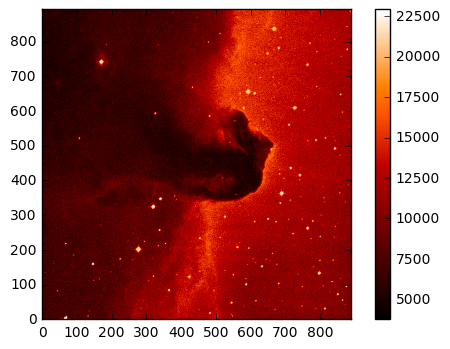

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(image_data, cmap='gist_heat', origin='lower')
plt.colorbar();

## 3. Opening FITS in a more general way

In [35]:
hdulist = fits.open(image_file)
hdulist.info()

Filename: /Users/jarredgreen/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [36]:
header = hdulist['PRIMARY'].header
data = hdulist['PRIMARY'].data

In [37]:
# to clear the item from your memory
hdulist.close

<bound method HDUList.close of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x10f637cd0>, <astropy.io.fits.hdu.table.TableHDU object at 0x1151baa90>]>

In [38]:
# Now let's explore the header
print(repr(header[:10]))  # beginning of the header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               


In [40]:
# how to see the coordinates on the sky

from astropy.wcs import WCS
wcs = WCS(header)
print wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.599416666666656  -4.9466388888888888  
CRPIX : -716.333144294269  -8444.6494669822605  
PC1_1 PC1_2  : 0.015029018460682027  -9.6373577765719806e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893


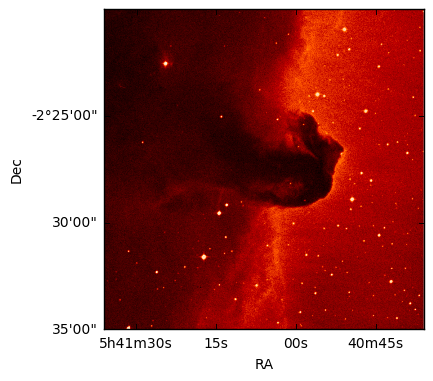

In [41]:
# now let's actually plot the figure with coordinates

# FINISH these notes
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(data, cmap='gist_heat',origin='lower')
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')

## 4. Coordinate transformations

In [42]:
# now let's compute the coordinates of the center of the horse head:

from astropy.coordinates import SkyCoord
c0 = SkyCoord('5h41m00s','-2d27m00s',frame='icrs')
print c0

<SkyCoord (ICRS): (ra, dec) in deg
    ( 85.25, -2.45)>


### From pixel coordinates and vice versa

In [11]:
# from pixel -> world

# from world -> pixel

In [48]:
# e.g.

center = wcs.all_world2pix(c0.ra,c0.dec,0)
print (center)

[array(534.1235215073059), array(475.55046970355943)]


## 5. Cutouts

- what to do when you only need a part of the image
- here we use the class Cutout2D

In [49]:
from astropy.nddata import Cutout2D
size = 400
cutout = Cutout2D(data, center, size, wcs=wcs)

print cutout.bbox_original

((276, 675), (334, 733))


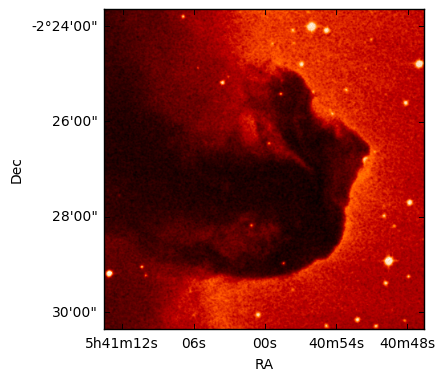

In [50]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data, cmap='gist_heat', origin='lower')
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss');

## 6. Saving a new FITS file

In [33]:
# Making a Primary HDU
# finish this...

In [51]:
# the overwrite = True allows us to rewrite over the old file

cheader = cutout.wcs.to_header()
primaryhdu = fits.PrimaryHDU(cutout.data, cheader)
hdulist = fits.HDUList([primaryhdu])
hdulist.writeto('horse.fits', overwrite=True)

## 7. Tables in astropy

- You can also use the FITS interface to open tables

```python
from astropy.table import Table
#getting the first table
t1 = Table.read(filename.fits)
```

- if you go back and look at the log for the horsehead file, yo ucan see that we also have a table in extension 1

In [52]:
from astropy.table import Table
t = Table.read(image_file, hdu=1)
t[:10].show_in_notebook()

idx,XI,ETA,XI_CORR,ETA_CORR
,DEGREES,DEGREES,ARCSEC,ARCSEC
0,-3.12,-3.12,0.09,0.04
1,-2.96,-3.12,0.02,0.07
2,-2.8,-3.12,-0.07,0.15
3,-2.64,-3.12,-0.17,0.25
4,-2.48,-3.12,-0.29,0.26
5,-2.32,-3.12,-0.38,0.25
6,-2.16,-3.12,-0.42,0.15
7,-2.0,-3.12,-0.48,0.06
8,-1.84,-3.12,-0.47,-0.01


In [54]:
# you can also just print the table

from astropy.table import Table
t = Table.read(image_file, hdu=1)
print(t[:10])

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -3.12   -3.12    0.09     0.04
  -2.96   -3.12    0.02     0.07
   -2.8   -3.12   -0.07     0.15
  -2.64   -3.12   -0.17     0.25
  -2.48   -3.12   -0.29     0.26
  -2.32   -3.12   -0.38     0.25
  -2.16   -3.12   -0.42     0.15
   -2.0   -3.12   -0.48     0.06
  -1.84   -3.12   -0.47    -0.01
  -1.68   -3.12   -0.47    -0.12


- a table is bot ha dictionary and numpy arry like datatype that can be acceped by a key (for columns) or index (for rows)
- this can be useful if you have a table with many colums and you only need a few

In [57]:
# e.g.
import numpy as np
print t[np.where(t['ETA_CORR'] > 0.8)]

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -0.24    2.96   -0.11     0.81
  -0.08    2.96   -0.06     0.86
   0.08    2.96    0.05     0.88
   0.24    2.96    0.13     0.82
  -0.24    3.12   -0.12     0.85
  -0.08    3.12   -0.07      0.9
   0.08    3.12    0.07     0.91
   0.24    3.12     0.2      0.9
    0.4    3.12    0.23     0.83


## 8. Making a table

-- see his example --

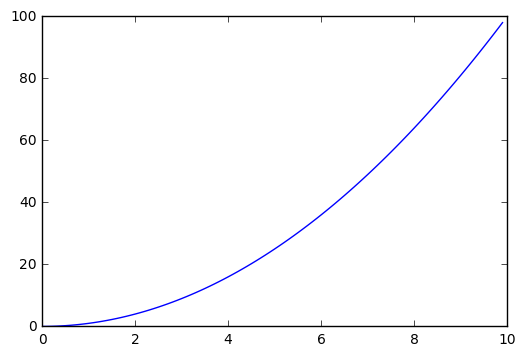

In [68]:
import numpy as np
a = np.arange(0,10,0.1)
b = a**2
t1 = Table([a,b], names=('a','b'))

plt.plot(t1['a'],t1['b']);


### Saving your table

In [69]:
t1.write('table.txt',format='ascii.tab')

In [70]:
!cat table.txt

a	b
0.0	0.0
0.1	0.010000000000000002
0.2	0.04000000000000001
0.30000000000000004	0.09000000000000002
0.4	0.16000000000000003
0.5	0.25
0.6000000000000001	0.3600000000000001
0.7000000000000001	0.4900000000000001
0.8	0.6400000000000001
0.9	0.81
1.0	1.0
1.1	1.2100000000000002
1.2000000000000002	1.4400000000000004
1.3	1.6900000000000002
1.4000000000000001	1.9600000000000004
1.5	2.25
1.6	2.5600000000000005
1.7000000000000002	2.8900000000000006
1.8	3.24
1.9000000000000001	3.6100000000000003
2.0	4.0
2.1	4.41
2.2	4.840000000000001
2.3000000000000003	5.290000000000001
2.4000000000000004	5.760000000000002
2.5	6.25
2.6	6.760000000000001
2.7	7.290000000000001
2.8000000000000003	7.840000000000002
2.9000000000000004	8.410000000000002
3.0	9.0
3.1	9.610000000000001
3.2	10.240000000000002
3.3000000000000003	10.890000000000002
3.4000000000000004	11.560000000000002
3.5	12.25
3.6	12.96
3.7	13.690000000000001
3.8000000000000003	14.440000000000001
3.9000000000000004	15.210000000000003
4.0	16.0
4.100000000000

## 9. Astronomical units

- astropy provides a way to manipulate quantities, automatically taking care of unit conversions automatically
- that's amazing!!!

```python
from astropy import units as u
#defining quantities with units:
val1, val2 = 30.2 * u.cm, 2.2E4 * u.s
val3 = val1 / val2 # will be units cm/s
#converting units
val3km = val3.to(u.km/u.s)
#simplifying
val4 = (10.3 * u.s / (3* u.Hz)).decompose()
```

In [72]:
from astropy import units as u

val = 30.3 * u.cm
print val.to(u.km)

# convert
val1 = 10 * u.km
val2 = 100. * u.m

#simplify
print (val1/val2).decompose()

0.000303 km
100.0


In [73]:
val1 = 5 * u.m
val2 = 6 * u.s
print(val1/val2)

0.833333333333 m / s


## 10. Astronomical constants

- also so helpful!

```python
from astropy import constants as c
# some constants
c.k_B, c_c, c.M_sun, c.L_sun
# can use with units
energy = c.h * 30 * u.Ghz
# can also convert units
```


In [74]:
from astropy import constants as c

print 'solarmass: ', c.M_sun.value, c.M_sun.unit,'\n'

print (c.c)

solarmass:  1.9891e+30 kg 

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010


In [76]:
# this is a great way to convert to cgs units
print c.c.cgs

29979245800.0 cm / s


## 11. Astronomical query
- we can use this to query databases.  cool!
- we will do an example with SDSS

In [79]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord('13h10m27.46s +18d26m17.4s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,str4
197.614455643,18.4381688537,1237668296598749280,5314,301,1,136,0.0124487,2618,54506,310,2947691243863304192,26,SDSS


- now we can get the specra and images for this list of objects using the following commands.
- we will obtain a list with as many objects as the list from xid
- in this case, it's only one object

In [80]:


sp = SDSS.get_spectra(matches=xid)
im = SDSS.get_images(matches=xid, band='r')

print len(sp), len(im)

1 1


- we can also access the SDSS template library
- for instance we will get **qso** template with the command:

In [82]:
template = SDSS.get_spectral_template('qso')
print len(template)

1


- let's go back to the image
- we can emplore what is inside using the **.info** method:

In [83]:
hdulist = im[0]
hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      96   (2048, 1489)   float32   
  1              ImageHDU         6   (2048,)   float32   
  2              BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3              BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


- now let's extract the data

((1489, 2048), 'float32')


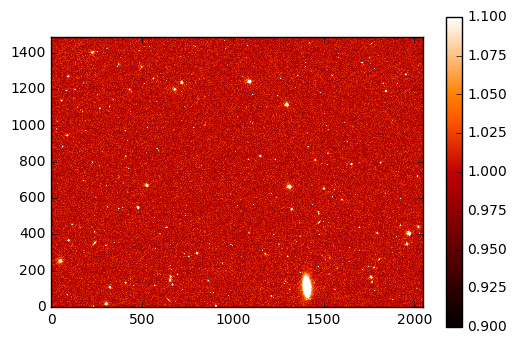

In [86]:
header = hdulist[0].header
data = hdulist[0].data #image in lst extension
print (data.shape, data.dtype.name)

import numpy as np
plt.imshow(np.sqrt(data+1.),origin='lower', cmap='gist_heat', vmax=1.1,vmin=0.9)
plt.colorbar();